## Table 1. Transaction database D

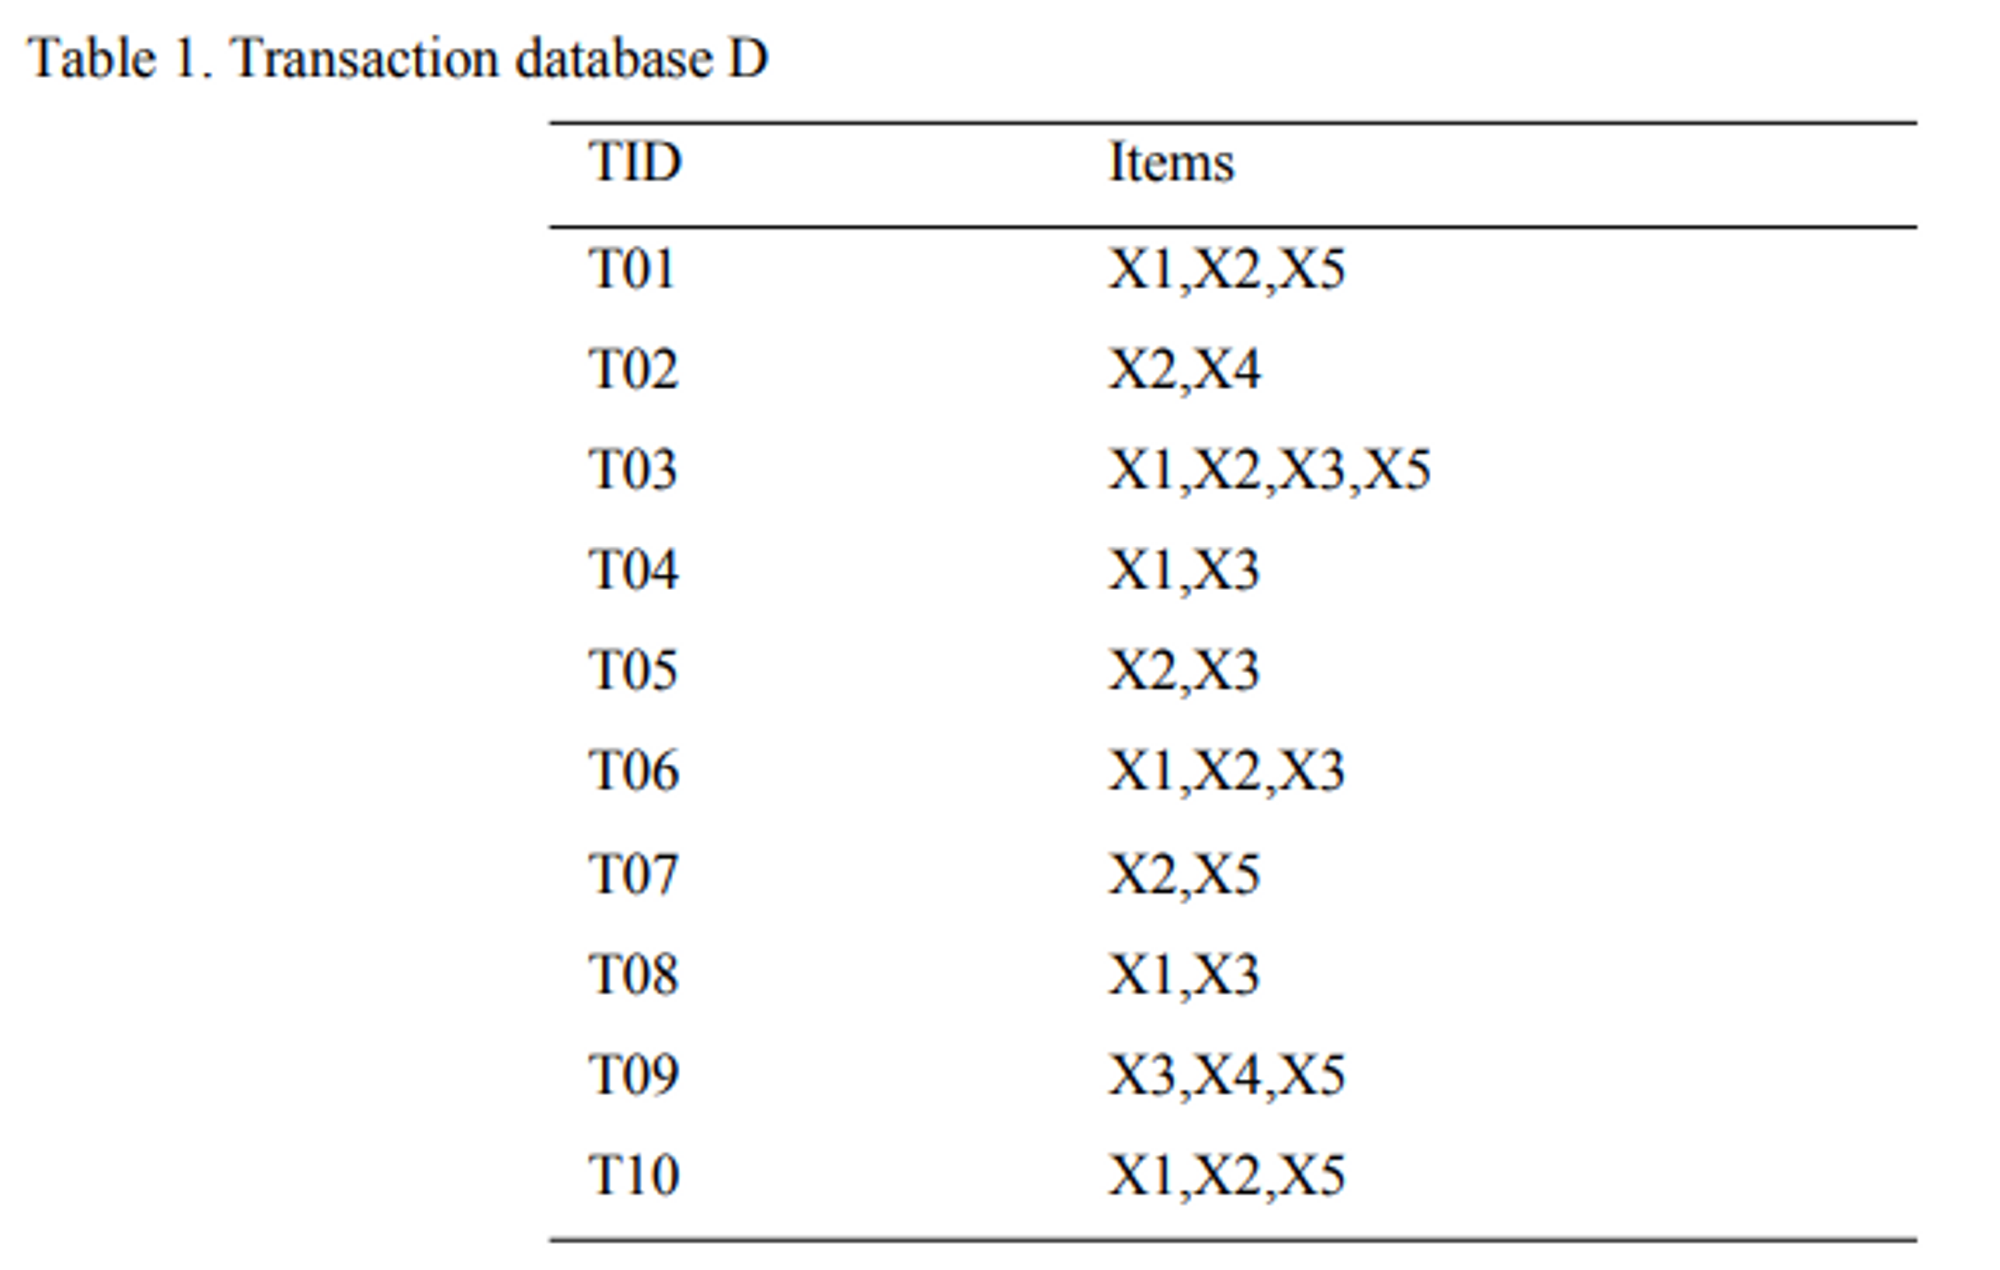

In [1]:
data = {
    'T01': ('X1', 'X2','X5'), 'T02': ('X2', 'X4'), 'T03': ('X1', 'X2', 'X3', 'X5'), 
    'T04': ('X1', 'X3'), 'T05': ('X2', 'X3'), 'T06': ('X1', 'X2', 'X3'), 
    'T07': ('X2','X5'), 'T08': ('X1', 'X3'), 'T09': ('X3', 'X4', 'X5'), 'T10': ('X1', 'X2', 'X5')
}

data

{'T01': ('X1', 'X2', 'X5'),
 'T02': ('X2', 'X4'),
 'T03': ('X1', 'X2', 'X3', 'X5'),
 'T04': ('X1', 'X3'),
 'T05': ('X2', 'X3'),
 'T06': ('X1', 'X2', 'X3'),
 'T07': ('X2', 'X5'),
 'T08': ('X1', 'X3'),
 'T09': ('X3', 'X4', 'X5'),
 'T10': ('X1', 'X2', 'X5')}

## Table 2. Analysis results
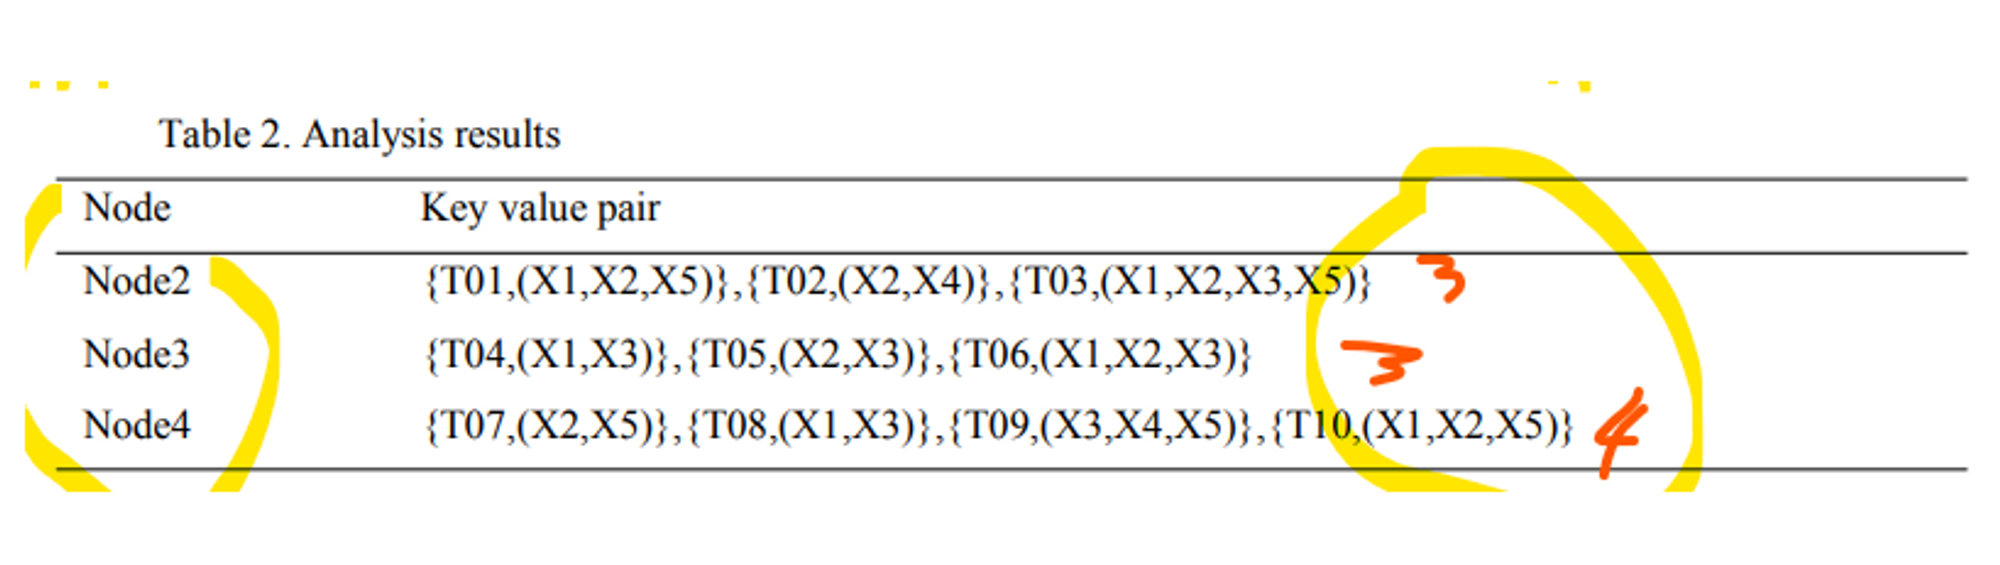

In [2]:
def split_dict(input_dict: dict, num_parts: int) -> list:
    list_len: int = len(input_dict)
    return [(f'Node{i+2}', dict(list(input_dict.items())[i * list_len // num_parts:(i + 1) * list_len // num_parts]))
        for i in range(num_parts)]
        
N_data_blocks = split_dict(data, 3)

N_data_blocks

[('Node2',
  {'T01': ('X1', 'X2', 'X5'),
   'T02': ('X2', 'X4'),
   'T03': ('X1', 'X2', 'X3', 'X5')}),
 ('Node3',
  {'T04': ('X1', 'X3'), 'T05': ('X2', 'X3'), 'T06': ('X1', 'X2', 'X3')}),
 ('Node4',
  {'T07': ('X2', 'X5'),
   'T08': ('X1', 'X3'),
   'T09': ('X3', 'X4', 'X5'),
   'T10': ('X1', 'X2', 'X5')})]

## Table 3. Candidate 1 item set
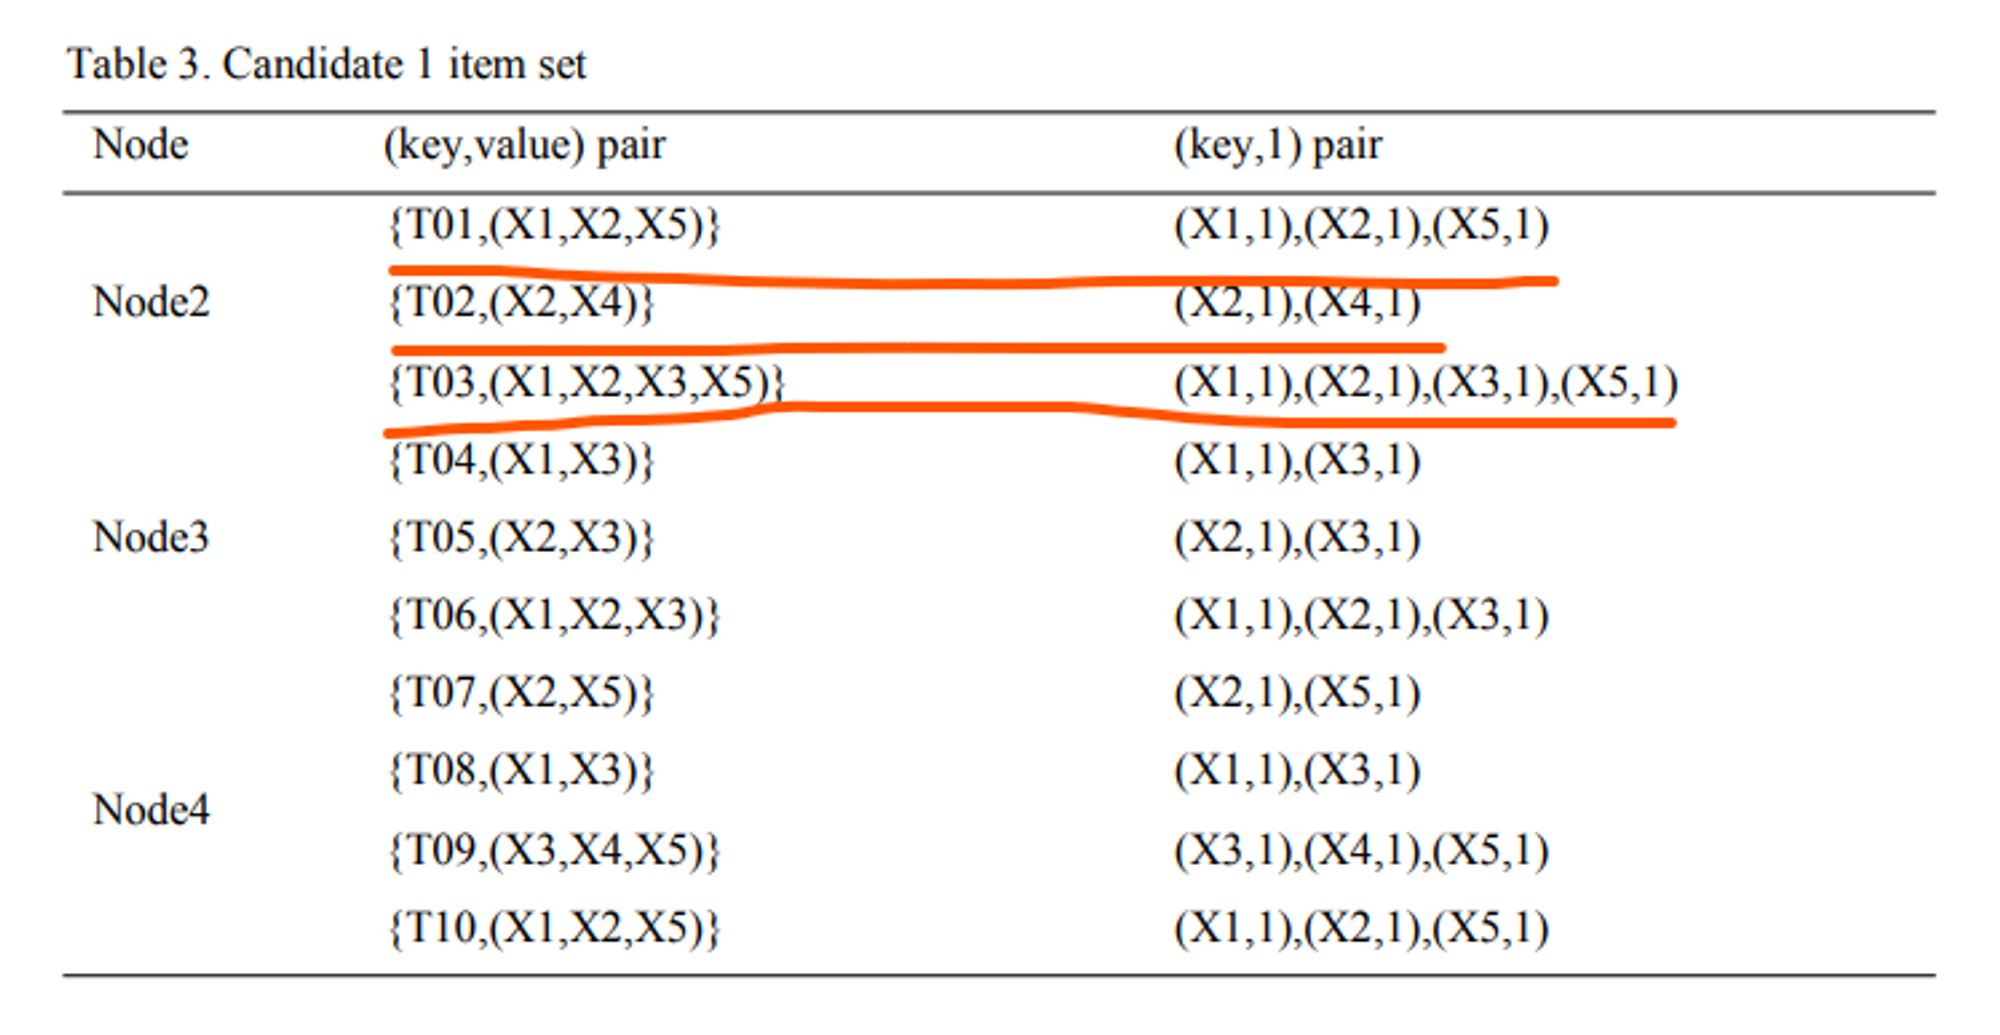

In [41]:
# data_block은 ('Node', {'T01': ('X1', 'X2', 'X3')}) <- 이런 형태로 들어온다.
def candidate_item_set(data_blocks: tuple) -> tuple:
    return tuple(map(lambda T_item_set: tuple(map(lambda x: (x, 1), data_blocks[1].get(T_item_set))), data_blocks[1]))
            
candidate_item_set(N_data_blocks[0])

((('X1', 1), ('X2', 1), ('X5', 1)),
 (('X2', 1), ('X4', 1)),
 (('X1', 1), ('X2', 1), ('X3', 1), ('X5', 1)))

In [52]:
# hadoop mapreduce 동작 방식이 어떻게 되는지 모르겠지만, 간단한 알고리즘으로 만들때는, 굳이 개수를 count 할 필요없어 보인다.
def candidate_item_set_m(data_blocks: tuple) -> tuple:
    return tuple(map(lambda T_item_set: tuple(map(lambda x: x, data_blocks[1].get(T_item_set))), data_blocks[1]))
            
test = candidate_item_set_m(N_data_blocks[0])
test

(('X1', 'X2', 'X5'), ('X2', 'X4'), ('X1', 'X2', 'X3', 'X5'))

## Table 4. Local candidate 1 item set

### Case 1

In [58]:
from collections import defaultdict

# 이름은 나중에 바꾸기
# 이 부분은, {T01, (X1, X2, X5)} <- 이런 형태일때 바로 해주는게 더 효율적이지 않을까?
def local_item_count(candidate_item_set):
    local_item_count = defaultdict(int)

    for t in test:
        for key in t:
            local_item_count[key] += 1
            
    return local_item_count
    
local_item_count(test)

defaultdict(int, {'X1': 2, 'X2': 3, 'X5': 2, 'X4': 1, 'X3': 1})

### Case 2

In [62]:
import collections

def local_item_count_v2(candidate_item_set):
    return collections.Counter([x for t in candidate_item_set for x in t])

local_item_count_v2(test)

Counter({'X1': 2, 'X2': 3, 'X5': 2, 'X4': 1, 'X3': 1})

## Table 5. Local frequent 1 item set
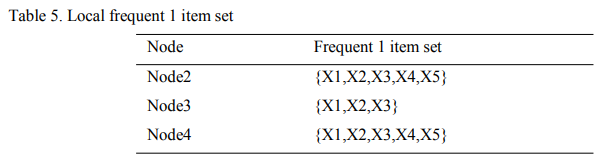

In [63]:
local_item_count(test).keys()

dict_keys(['X1', 'X2', 'X5', 'X4', 'X3'])

## Table 6. Local candidate 3 item set
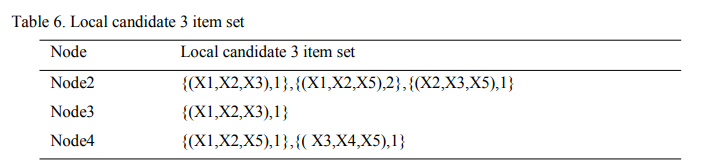

이런식으로, 이제 PyPI에서 찾아본 라이브러리 모듈을 조금 변형해서 진행하면 될 것 같다.